In [1]:
import pandas as pd
df = pd.read_csv("./fb_sentiment.csv")
df.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [2]:
review_df = df[['FBPost','Label']]

print(review_df.shape)
review_df.head(5)

(1000, 2)


,FBPost,Label
0,Drug Runners and a U.S. Senator have somethin...,O
1,"Heres a single, to add, to Kindle. Just read t...",O
2,If you tire of Non-Fiction.. Check out http://...,O
3,Ghost of Round Island is supposedly nonfiction.,O
4,Why is Barnes and Nobles version of the Kindle...,N


dropping neutral comments

In [3]:
review_df = review_df[review_df['Label'] != 'O']

print(review_df.shape)
review_df.head(5)

(720, 2)


,FBPost,Label
4,Why is Barnes and Nobles version of the Kindle...,N
5,"@Maria: Do you mean the Nook? Be careful, bo...",P
6,kindle is awesome! mines great,P
7,I love mine!!!!,P
8,Meh. I think Singles are a bad idea. Big name ...,N


In [4]:
review_df["Label"].value_counts()

P    641
N     79
Name: Label, dtype: int64

converting categorical values to numeric data using factorize method, 0-positive, 1-negative

In [5]:
sentiment_label = review_df.Label.factorize()
sentiment_label

(array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Now, the major part in python sentiment analysis. We should transform our text data into something that our machine learning model understands. Basically, we need to convert the text into an array of vector embeddings. Word embeddings are a beautiful way of representing the relationship between the words in the text. To do this, we first give each of the unique words a unique number and then replace that word with the number assigned.

In [7]:
posts = review_df.FBPost.values
posts

array(['Why is Barnes and Nobles version of the Kindle so much more expensive than the Kindle?',
       '@Maria:  Do you mean the Nook?  Be careful, books you buy for the Kindle are for that piece of electronics, and vice versa.  I love my Kindle, there are people that swear by the Nook.  They like the color screen.Me?  I want an ereader that is a reader-- so I dont need color.  The kindle battery lasts longer, and the unit isnt as heavy, which can make a difference after reading for a few hours. :)',
       'kindle is awesome! mines great', 'I love mine!!!!',
       'Meh. I think Singles are a bad idea. Big name authors already dominate the market by a huge factor. Now you are letting them compete on price point with indie authors (albeit giving less content for the money).',
       'My daugjhter loves hers!',
       'I am not sure if i just got my update but now i dont have location numbers unless i press the menu button.  But i also dont have page numbers! Am i doing something wrong

tokenizing all the words, The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(posts)

In [9]:
print(tokenizer.word_index)

{'i': 1, 'the': 2, 'kindle': 3, 'my': 4, 'to': 5, 'a': 6, 'and': 7, 'it': 8, 'love': 9, 'for': 10, 'have': 11, 'is': 12, 'of': 13, 'in': 14, 'books': 15, 'that': 16, 'this': 17, 'with': 18, 'you': 19, 'on': 20, 'read': 21, 'one': 22, 'so': 23, 'me': 24, 'but': 25, 'book': 26, 'reading': 27, 'be': 28, 'not': 29, 'can': 30, 'just': 31, 'are': 32, 'would': 33, 'great': 34, 'like': 35, 'they': 36, 'was': 37, 'its': 38, 'as': 39, 'all': 40, 'when': 41, 'do': 42, 'free': 43, 'if': 44, 'them': 45, 'at': 46, 'about': 47, 'get': 48, 'got': 49, 'or': 50, 'up': 51, 'best': 52, 'how': 53, 'your': 54, 'too': 55, 'dont': 56, 'feature': 57, 'from': 58, 'much': 59, 'im': 60, 'time': 61, 'no': 62, 'mine': 63, 'there': 64, 'an': 65, 'use': 66, 'we': 67, 'now': 68, 'am': 69, 'out': 70, 'had': 71, 'more': 72, 'new': 73, 'what': 74, 'ever': 75, 'bought': 76, 'has': 77, 'while': 78, 'thing': 79, 'go': 80, 'want': 81, 'very': 82, 'amazon': 83, 'than': 84, 'really': 85, 'dictionary': 86, 'only': 87, 'cant': 8

now, we replace the words with their assigned numbers

In [10]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(posts)
print(posts[0])
print(encoded_docs[0])

Why is Barnes and Nobles version of the Kindle so much more expensive than the Kindle?
[158, 12, 1138, 7, 1139, 325, 13, 2, 3, 23, 59, 72, 295, 84, 2, 3]


now use padding to make all sentences equal length

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           79360     
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 96,011
Trainable params: 96,011
Non-trainable params: 0
__________________________________________________

In [14]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
18/18 [==============================] - 4s 105ms/step - loss: 0.5933 - accuracy: 0.8733 - val_loss: 0.3924 - val_accuracy: 0.8611
Epoch 2/10
18/18 [==============================] - 1s 83ms/step - loss: 0.3422 - accuracy: 0.8976 - val_loss: 0.4175 - val_accuracy: 0.8611
Epoch 3/10
18/18 [==============================] - 1s 80ms/step - loss: 0.3327 - accuracy: 0.8976 - val_loss: 0.3991 - val_accuracy: 0.8611
Epoch 4/10
18/18 [==============================] - 2s 104ms/step - loss: 0.3280 - accuracy: 0.8976 - val_loss: 0.4030 - val_accuracy: 0.8611
Epoch 5/10
18/18 [==============================] - 2s 114ms/step - loss: 0.3111 - accuracy: 0.8976 - val_loss: 0.3888 - val_accuracy: 0.8611
Epoch 6/10
18/18 [==============================] - 2s 113ms/step - loss: 0.2995 - accuracy: 0.8976 - val_loss: 0.3546 - val_accuracy: 0.8611
Epoch 7/10
18/18 [==============================] - 2s 116ms/step - loss: 0.2655 - accuracy: 0.8976 - val_loss: 0.3204 - val_accuracy: 0.8611
Epoch 8/

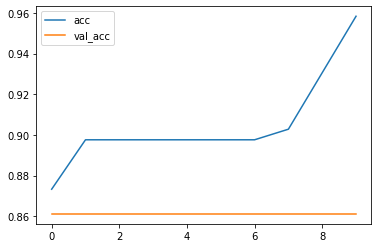

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

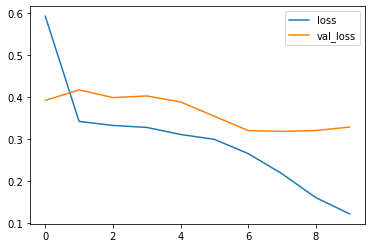

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [18]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "hii i am not happy today"
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)


1/1 [==============================] - 0s 32ms/step
Predicted label:  P
1/1 [==============================] - 0s 33ms/step
Predicted label:  P
